In [1]:
#Description: This dataset represents the Stock Price of Google incorporation between 2013-2018 years.
#The data is presented in csv format as follows: Date, Open, High, Low, Close, Volume,Adj Close.
#Task: You are asked to create a model using Facebook Prophet predict closing stock prices for the next 100 days.
#Tune the hyperparameters using Bayesian Optimization.

In [25]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [4]:
google=pd.read_csv("D:\data science\Week 10\Python\google-data.csv")

In [5]:
google.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
5,2013-01-09,363.769043,366.789398,361.945892,366.675140,366.675140,4075700
6,2013-01-10,369.014923,370.092896,364.380066,368.344269,368.344269,3695100
7,2013-01-11,368.602600,368.816193,365.771027,367.604095,367.604095,2587000
8,2013-01-14,366.118744,368.701935,358.841095,359.288177,359.288177,5765000
9,2013-01-15,357.340851,365.125214,353.749207,360.122742,360.122742,7906300


In [6]:
google.shape

(1259, 7)

In [7]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [8]:
google.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
google.duplicated().sum()

0

In [10]:
google.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
google.drop(['Open', 'High', 'Low','Adj Close', 'Volume'],axis=1,inplace=True)

In [12]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1259 non-null   object 
 1   Close   1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [13]:
google['Date'].min(),google['Date'].max()

('2013-01-02', '2017-12-29')

In [14]:
google['Date']=pd.to_datetime(google['Date'])


<Axes: >

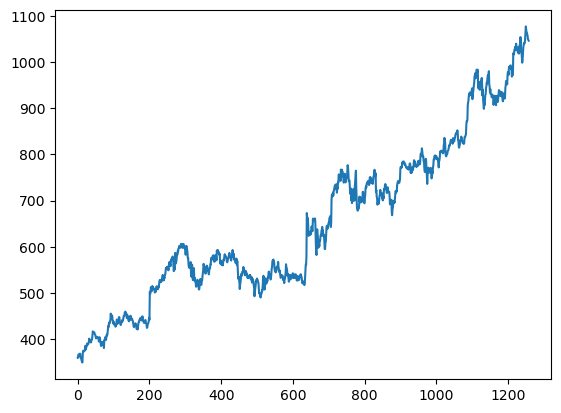

In [15]:
google['Close'].plot()

In [16]:
google

,Date,Close
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701
...,...,...
1254,2017-12-22,1060.119995
1255,2017-12-26,1056.739990
1256,2017-12-27,1049.369995
1257,2017-12-28,1048.140015


In [17]:
data=pd.DataFrame()
data['Date']=pd.date_range(start='2013-01-02', end='2017-12-29')
data['Date']                

0      2013-01-02
1      2013-01-03
2      2013-01-04
3      2013-01-05
4      2013-01-06
          ...    
1818   2017-12-25
1819   2017-12-26
1820   2017-12-27
1821   2017-12-28
1822   2017-12-29
Name: Date, Length: 1823, dtype: datetime64[ns]

In [18]:
google=pd.merge(google,data,on='Date',how='right')

In [19]:
google

,Date,Close
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-05,NaN
4,2013-01-06,NaN
...,...,...
1818,2017-12-25,NaN
1819,2017-12-26,1056.739990
1820,2017-12-27,1049.369995
1821,2017-12-28,1048.140015


In [20]:
google['Close'].isna().sum()


564

In [21]:
google['Close'].interpolate(method='cubic',inplace=True)

In [22]:
google['Close'].isna().sum()



0

In [26]:
google['Date'].dtype

dtype('<M8[ns]')

In [27]:
google.rename(columns={'Date':'ds','Close':'y'},inplace=True)

In [28]:
google

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-05,369.244832
4,2013-01-06,367.666599
...,...,...
1818,2017-12-25,1060.584585
1819,2017-12-26,1056.739990
1820,2017-12-27,1049.369995
1821,2017-12-28,1048.140015


In [46]:
model=Prophet()
m=model.fit(google)

20:42:49 - cmdstanpy - INFO - Chain [1] start processing
20:42:51 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
google_future=model.make_future_dataframe(periods=100,freq='D')

In [50]:
google_forecast=model.predict(google_future)

In [51]:
google_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,368.842788,339.389762,396.599580,368.842788,368.842788,-0.043029,-0.043029,-0.043029,0.675625,0.675625,0.675625,-0.718653,-0.718653,-0.718653,0.0,0.0,0.0,368.799759
1,2013-01-03,369.185116,339.664410,396.262458,369.185116,369.185116,-1.645156,-1.645156,-1.645156,-0.092292,-0.092292,-0.092292,-1.552864,-1.552864,-1.552864,0.0,0.0,0.0,367.539960
2,2013-01-04,369.527444,338.716796,394.295638,369.527444,369.527444,-2.267092,-2.267092,-2.267092,0.087487,0.087487,0.087487,-2.354579,-2.354579,-2.354579,0.0,0.0,0.0,367.260353
3,2013-01-05,369.869772,340.441106,394.941734,369.869772,369.869772,-3.032201,-3.032201,-3.032201,0.082932,0.082932,0.082932,-3.115133,-3.115133,-3.115133,0.0,0.0,0.0,366.837571
4,2013-01-06,370.212100,340.371017,394.920811,370.212100,370.212100,-4.105716,-4.105716,-4.105716,-0.278748,-0.278748,-0.278748,-3.826968,-3.826968,-3.826968,0.0,0.0,0.0,366.106384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,2018-04-04,1116.706789,1073.267756,1156.100065,1088.580207,1146.261450,-1.475388,-1.475388,-1.475388,0.675625,0.675625,0.675625,-2.151013,-2.151013,-2.151013,0.0,0.0,0.0,1115.231400
1919,2018-04-05,1117.413423,1071.368235,1158.319831,1089.015201,1147.569862,-3.071118,-3.071118,-3.071118,-0.092292,-0.092292,-0.092292,-2.978827,-2.978827,-2.978827,0.0,0.0,0.0,1114.342305
1920,2018-04-06,1118.120057,1075.320561,1158.365804,1089.264155,1148.653515,-3.630249,-3.630249,-3.630249,0.087487,0.087487,0.087487,-3.717736,-3.717736,-3.717736,0.0,0.0,0.0,1114.489808
1921,2018-04-07,1118.826692,1073.208392,1157.049701,1089.456398,1149.689594,-4.278522,-4.278522,-4.278522,0.082932,0.082932,0.082932,-4.361454,-4.361454,-4.361454,0.0,0.0,0.0,1114.548169


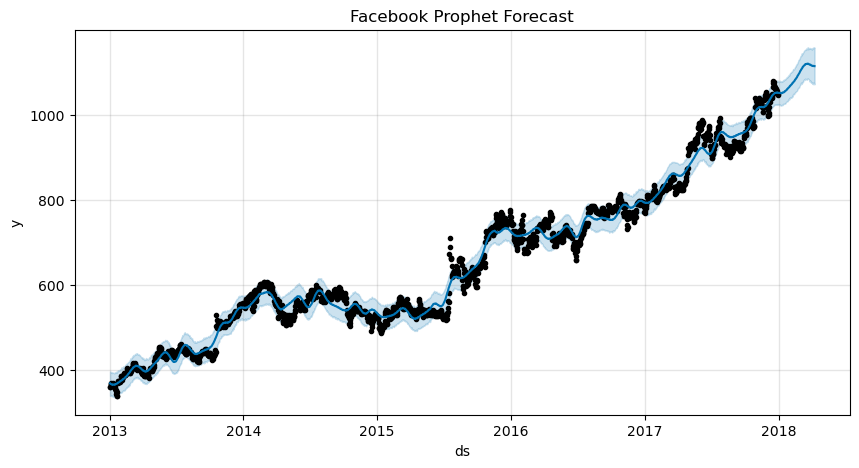

In [52]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))
fig=model.plot(google_forecast,ax=ax)
ax.set_title('Facebook Prophet Forecast')
plt.show()

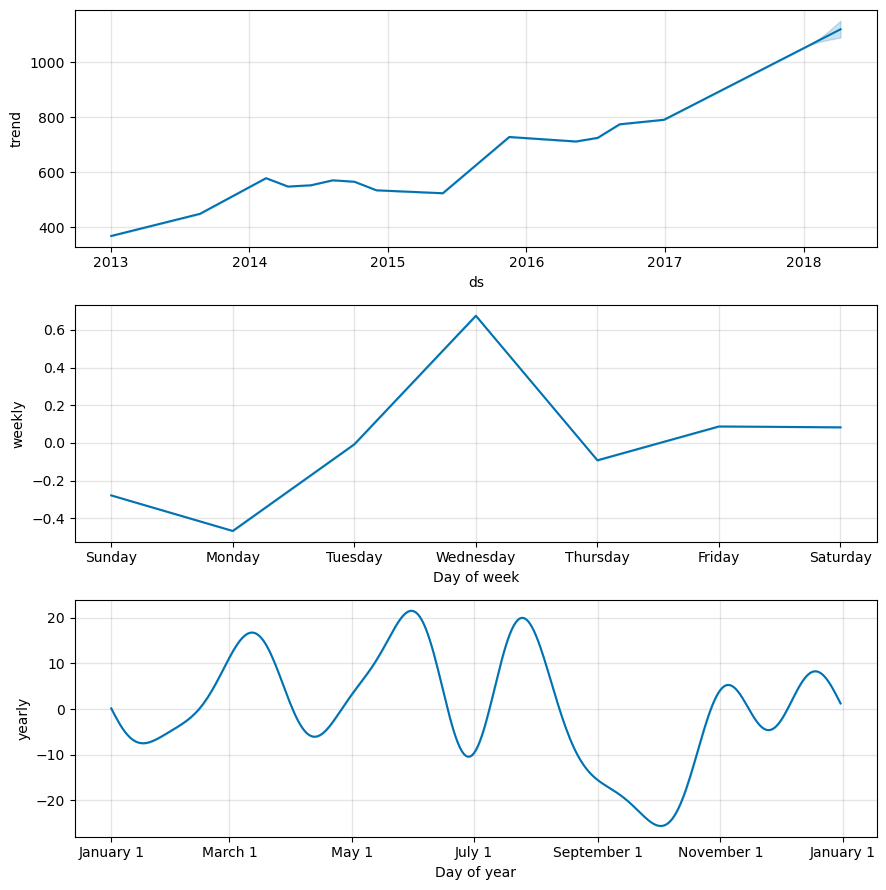

In [53]:
model.plot_components(google_forecast)
plt.show()

In [ ]:
###Bayesian Optimization

In [73]:
pip install bayesian-optimization


Note: you may need to restart the kernel to use updated packages.


In [145]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_absolute_error

In [ ]:
bayesian_model=Prophet()

In [146]:
def prophet_f(changepoint_prior_scale, seasonality_prior_scale):
    
    
    m=Prophet(changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale= seasonality_prior_scale)
    m.fit(google)
    future=model.make_future_dataframe(periods=100,freq='D')
    forecast=model.predict(future) 

    perform=mean_absolute_error(forecast['yhat'],google_forecast['yhat'])
    return -perform
    

In [147]:
pbounds={'changepoint_prior_scale':(0.01, 0.1),
        'seasonality_prior_scale':(0.01,10.0)}

In [148]:
optimization=BayesianOptimization(
    f=prophet_f,
    pbounds=pbounds,
    constraint=None,
    random_state=1,
    verbose=2)
    

In [149]:
bayesian_opt = optimization.maximize()

|   iter    |  target   | change... | season... |
-------------------------------------------------


22:16:48 - cmdstanpy - INFO - Chain [1] start processing
22:16:49 - cmdstanpy - INFO - Chain [1] done processing


| 1         | -0.0      | 0.04753   | 7.206     |


22:16:50 - cmdstanpy - INFO - Chain [1] start processing
22:16:50 - cmdstanpy - INFO - Chain [1] done processing


| 2         | -0.0      | 0.01001   | 3.03      |


22:16:51 - cmdstanpy - INFO - Chain [1] start processing
22:16:52 - cmdstanpy - INFO - Chain [1] done processing


| 3         | -0.0      | 0.02321   | 0.9325    |


22:16:52 - cmdstanpy - INFO - Chain [1] start processing
22:16:53 - cmdstanpy - INFO - Chain [1] done processing


| 4         | -0.0      | 0.02676   | 3.462     |


22:16:54 - cmdstanpy - INFO - Chain [1] start processing
22:16:55 - cmdstanpy - INFO - Chain [1] done processing


| 5         | -0.0      | 0.04571   | 5.393     |


22:16:56 - cmdstanpy - INFO - Chain [1] start processing
22:16:57 - cmdstanpy - INFO - Chain [1] done processing


| 6         | -0.0      | 0.08274   | 9.999     |


22:16:57 - cmdstanpy - INFO - Chain [1] start processing
22:16:58 - cmdstanpy - INFO - Chain [1] done processing


| 7         | -0.0      | 0.04188   | 10.0      |


22:16:59 - cmdstanpy - INFO - Chain [1] start processing
22:17:00 - cmdstanpy - INFO - Chain [1] done processing


| 8         | -0.0      | 0.03707   | 0.0101    |


22:17:01 - cmdstanpy - INFO - Chain [1] start processing
22:17:01 - cmdstanpy - INFO - Chain [1] done processing


| 9         | -0.0      | 0.01232   | 9.999     |


22:17:02 - cmdstanpy - INFO - Chain [1] start processing
22:17:03 - cmdstanpy - INFO - Chain [1] done processing


| 10        | -0.0      | 0.09444   | 0.01015   |


22:17:04 - cmdstanpy - INFO - Chain [1] start processing
22:17:05 - cmdstanpy - INFO - Chain [1] done processing


| 11        | -0.0      | 0.04203   | 10.0      |


22:17:06 - cmdstanpy - INFO - Chain [1] start processing
22:17:07 - cmdstanpy - INFO - Chain [1] done processing


| 12        | -0.0      | 0.06347   | 0.01055   |


22:17:07 - cmdstanpy - INFO - Chain [1] start processing
22:17:08 - cmdstanpy - INFO - Chain [1] done processing


| 13        | -0.0      | 0.02386   | 9.999     |


22:17:09 - cmdstanpy - INFO - Chain [1] start processing
22:17:10 - cmdstanpy - INFO - Chain [1] done processing


| 14        | -0.0      | 0.03424   | 0.01025   |


22:17:11 - cmdstanpy - INFO - Chain [1] start processing
22:17:11 - cmdstanpy - INFO - Chain [1] done processing


| 15        | -0.0      | 0.01645   | 9.999     |


22:17:12 - cmdstanpy - INFO - Chain [1] start processing
22:17:13 - cmdstanpy - INFO - Chain [1] done processing


| 16        | -0.0      | 0.02485   | 0.01008   |


22:17:14 - cmdstanpy - INFO - Chain [1] start processing
22:17:16 - cmdstanpy - INFO - Chain [1] done processing


| 17        | -0.0      | 0.09848   | 9.999     |


22:17:16 - cmdstanpy - INFO - Chain [1] start processing
22:17:17 - cmdstanpy - INFO - Chain [1] done processing


| 18        | -0.0      | 0.04525   | 0.0115    |


22:17:18 - cmdstanpy - INFO - Chain [1] start processing
22:17:20 - cmdstanpy - INFO - Chain [1] done processing


| 19        | -0.0      | 0.09782   | 10.0      |


22:17:21 - cmdstanpy - INFO - Chain [1] start processing
22:17:22 - cmdstanpy - INFO - Chain [1] done processing


| 20        | -0.0      | 0.07055   | 0.01065   |


22:17:23 - cmdstanpy - INFO - Chain [1] start processing
22:17:24 - cmdstanpy - INFO - Chain [1] done processing


| 21        | -0.0      | 0.04324   | 10.0      |


22:17:25 - cmdstanpy - INFO - Chain [1] start processing
22:17:26 - cmdstanpy - INFO - Chain [1] done processing


| 22        | -0.0      | 0.05093   | 0.01006   |


22:17:26 - cmdstanpy - INFO - Chain [1] start processing
22:17:28 - cmdstanpy - INFO - Chain [1] done processing


| 23        | -0.0      | 0.06117   | 9.999     |


22:17:29 - cmdstanpy - INFO - Chain [1] start processing
22:17:30 - cmdstanpy - INFO - Chain [1] done processing


| 24        | -0.0      | 0.03496   | 0.01017   |


22:17:31 - cmdstanpy - INFO - Chain [1] start processing
22:17:32 - cmdstanpy - INFO - Chain [1] done processing


| 25        | -0.0      | 0.03251   | 0.01005   |


22:17:32 - cmdstanpy - INFO - Chain [1] start processing
22:17:34 - cmdstanpy - INFO - Chain [1] done processing


| 26        | -0.0      | 0.08933   | 10.0      |


22:17:35 - cmdstanpy - INFO - Chain [1] start processing
22:17:36 - cmdstanpy - INFO - Chain [1] done processing


| 27        | -0.0      | 0.09805   | 9.998     |


22:17:37 - cmdstanpy - INFO - Chain [1] start processing
22:17:39 - cmdstanpy - INFO - Chain [1] done processing


| 28        | -0.0      | 0.06636   | 0.01189   |


22:17:40 - cmdstanpy - INFO - Chain [1] start processing
22:17:41 - cmdstanpy - INFO - Chain [1] done processing


| 29        | -0.0      | 0.08058   | 9.999     |


22:17:42 - cmdstanpy - INFO - Chain [1] start processing
22:17:43 - cmdstanpy - INFO - Chain [1] done processing


| 30        | -0.0      | 0.03613   | 0.01036   |


In [157]:
optimization.max


{'target': -0.0,
 'params': {'changepoint_prior_scale': 0.047531980423231666,
  'seasonality_prior_scale': 7.20604168948716}}

In [185]:
best_model=Prophet(changepoint_prior_scale =  0.047531980423231666 ,seasonality_prior_scale=7.20604168948716 )
best_model.fit(google)

23:10:01 - cmdstanpy - INFO - Chain [1] start processing
23:10:02 - cmdstanpy - INFO - Chain [1] done processing


In [186]:
 future_of_best=best_model.make_future_dataframe(periods=100,freq='D')
 forecast_of_best=best_model.predict(future_of_best) 

In [187]:
forecast_of_best

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,369.579757,341.755263,397.206580,369.579757,369.579757,-0.180966,-0.180966,-0.180966,0.674962,0.674962,0.674962,-0.855928,-0.855928,-0.855928,0.0,0.0,0.0,369.398791
1,2013-01-03,369.917032,338.813709,395.179015,369.917032,369.917032,-1.797046,-1.797046,-1.797046,-0.092139,-0.092139,-0.092139,-1.704907,-1.704907,-1.704907,0.0,0.0,0.0,368.119986
2,2013-01-04,370.254308,340.586452,394.893694,370.254308,370.254308,-2.431948,-2.431948,-2.431948,0.088690,0.088690,0.088690,-2.520638,-2.520638,-2.520638,0.0,0.0,0.0,367.822360
3,2013-01-05,370.591583,340.496702,397.206698,370.591583,370.591583,-3.213622,-3.213622,-3.213622,0.080685,0.080685,0.080685,-3.294307,-3.294307,-3.294307,0.0,0.0,0.0,367.377962
4,2013-01-06,370.928858,339.883698,394.365802,370.928858,370.928858,-4.297735,-4.297735,-4.297735,-0.279517,-0.279517,-0.279517,-4.018218,-4.018218,-4.018218,0.0,0.0,0.0,366.631123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,2018-04-04,1115.732172,1074.129320,1155.092249,1085.568817,1145.319833,-1.619462,-1.619462,-1.619462,0.674962,0.674962,0.674962,-2.294424,-2.294424,-2.294424,0.0,0.0,0.0,1114.112710
1919,2018-04-05,1116.435286,1071.189984,1155.309500,1085.551082,1146.733512,-3.213334,-3.213334,-3.213334,-0.092139,-0.092139,-0.092139,-3.121195,-3.121195,-3.121195,0.0,0.0,0.0,1113.221952
1920,2018-04-06,1117.138400,1070.660620,1158.489161,1085.511665,1147.956825,-3.770709,-3.770709,-3.770709,0.088690,0.088690,0.088690,-3.859399,-3.859399,-3.859399,0.0,0.0,0.0,1113.367692
1921,2018-04-07,1117.841514,1070.758559,1156.252299,1085.649560,1149.028552,-4.422130,-4.422130,-4.422130,0.080685,0.080685,0.080685,-4.502815,-4.502815,-4.502815,0.0,0.0,0.0,1113.419385


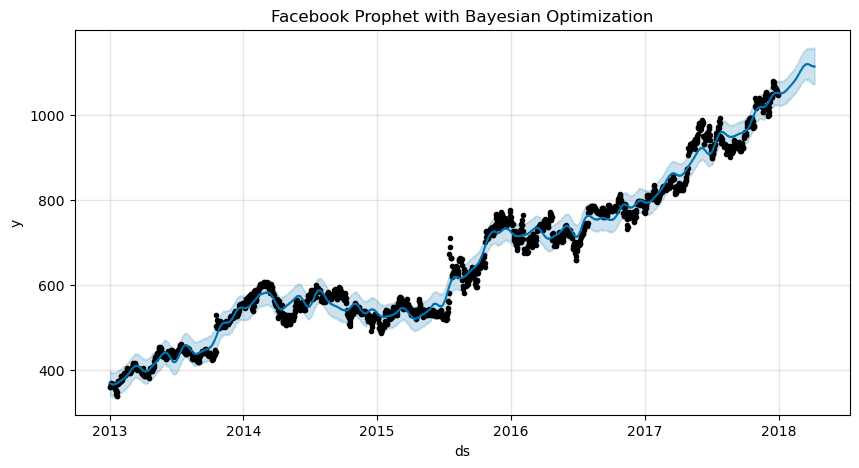

In [188]:
fig,ax=plt.subplots(figsize=(10,5))
fig=model.plot(forecast_of_best,ax=ax)
ax.set_title('Facebook Prophet with Bayesian Optimization')
plt.show()

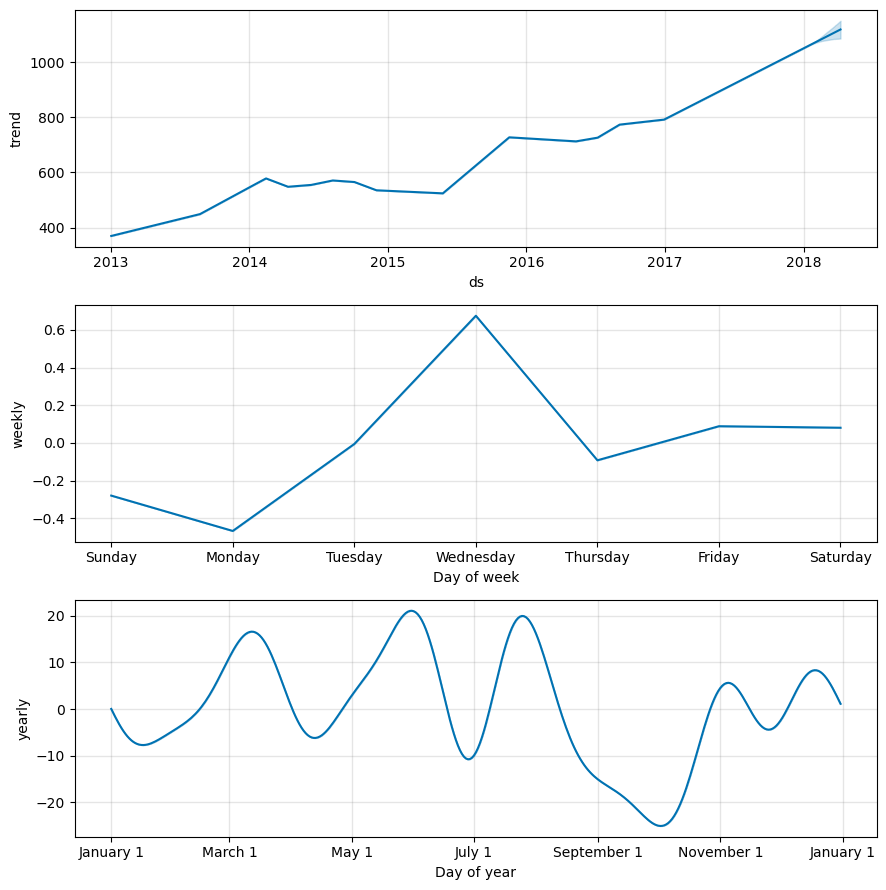

In [189]:
best_model.plot_components(forecast_of_best)
plt.show()

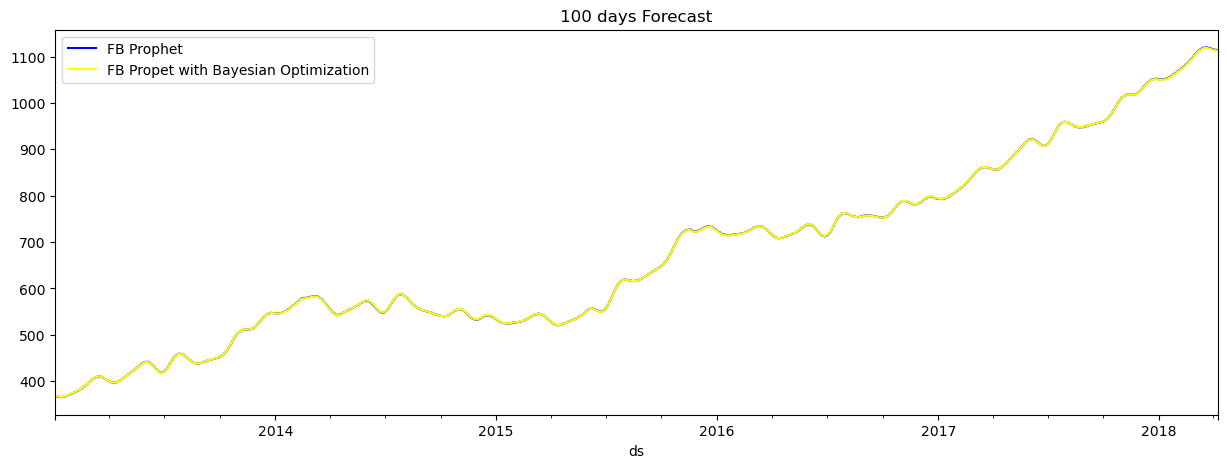

In [190]:
f, ax = plt.subplots(figsize=(15,5))
f.set_figheight(5)
f.set_figwidth(15)
google_forecast.plot(kind='line',x='ds', y='yhat', color='blue', label='FB Prophet', ax=ax)
forecast_of_best.plot(kind='line',x='ds',y='yhat', color='yellow',label='FB Propet with Bayesian Optimization', ax=ax)
plt.title('100 days Forecast')
plt.show()